In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the data
data = pd.read_csv('resources/flights.csv')
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0


In [3]:
# Drop unnecessary columns
data = data.drop(columns=['OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID','ARR_TIME'])

In [4]:
# check for missing values
data.isnull().sum()

DAY_OF_MONTH            0
DAY_OF_WEEK             0
OP_UNIQUE_CARRIER       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
DEST_AIRPORT_ID         0
DEST                    0
DEP_TIME             6664
DEP_DEL15            6699
DEP_TIME_BLK            0
ARR_DEL15            8078
CANCELLED               0
DIVERTED                0
DISTANCE                0
dtype: int64

In [5]:
# Drop rows with missing values
data = data.dropna()


In [6]:
# Convert time columns to numeric values
data['DEP_TIME'] = pd.to_numeric(data['DEP_TIME'], errors='coerce', downcast='integer')
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,3,EV,13930,ORD,11977,GRB,1003,0.0,1000-1059,0.0,0.0,0.0,174.0
1,1,3,EV,15370,TUL,13930,ORD,1027,0.0,1000-1059,0.0,0.0,0.0,585.0
2,1,3,EV,11618,EWR,15412,TYS,1848,0.0,1800-1859,0.0,0.0,0.0,631.0
3,1,3,EV,10781,BTR,12266,IAH,1846,0.0,1800-1859,0.0,0.0,0.0,253.0
4,1,3,EV,14524,RIC,12266,IAH,1038,0.0,1000-1059,0.0,0.0,0.0,1157.0


In [7]:
data = pd.get_dummies(data, columns=['DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK'])

In [8]:
# Define features and target
X = data.drop(columns=['ARR_DEL15'])
y = data['ARR_DEL15']

In [9]:
# Train-test split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Initialize the Optimized Gradient Boosting Classifier with the best hyperparameters
best_params = {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}
clf = GradientBoostingClassifier(**best_params)

In [12]:
# Train the model
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [13]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [14]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Training Accuracy:  0.9320879240072255
Testing Accuracy:  0.932100722545764

Confusion Matrix:
 [[99425  3965]
 [ 4173 12291]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    103390
         1.0       0.76      0.75      0.75     16464

    accuracy                           0.93    119854
   macro avg       0.86      0.85      0.86    119854
weighted avg       0.93      0.93      0.93    119854



In [15]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'plt' is not defined

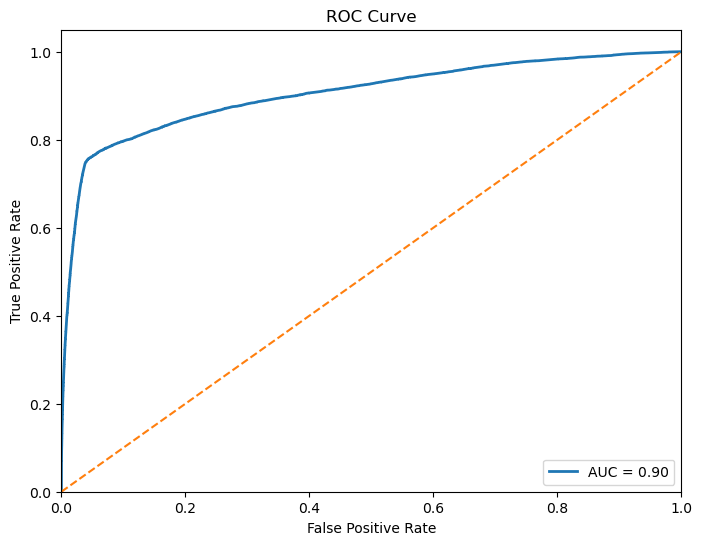

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

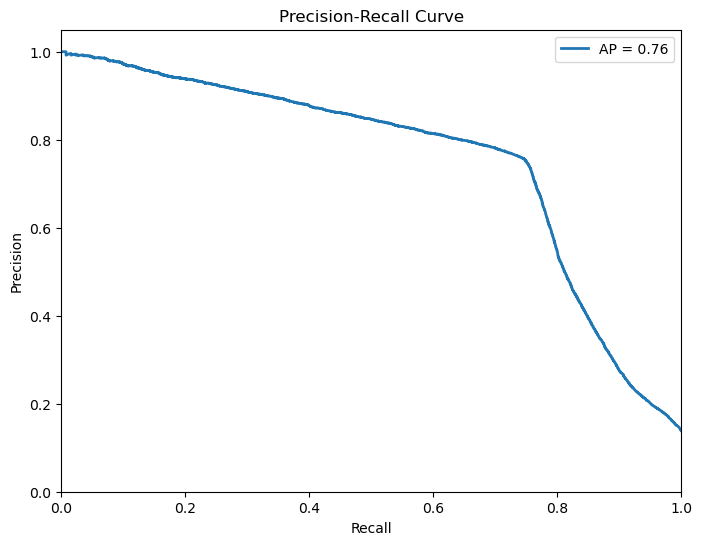

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label='AP = %0.2f' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(clf, 'flight_delay_gradient_boosting_classifier.pkl')


['flight_delay_gradient_boosting_classifier.pkl']